<a href="https://colab.research.google.com/github/kijunkim9/machine-learning/blob/master/Iris_kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 출처 : https://eunsukimme.github.io/ml/2019/12/16/K-Means/

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
#print(samples)

"""
 row vector는 데이터의 sample
 column vector는 sepal length(꽃받침의 길이), sepal width(꽃받침의 넓이), petal length(꽃잎의 길이), petal width(꽃잎의 넓이) features를 나타낸다.
"""  

'\n row vector는 데이터의 sample\n column vector는 sepal length(꽃받침의 길이), sepal width(꽃받침의 넓이), petal length(꽃잎의 길이), petal width(꽃잎의 넓이) features를 나타낸다.\n'

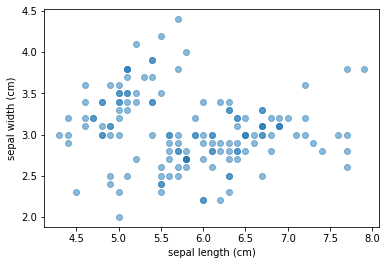

In [2]:
from matplotlib import pyplot as plt
x = samples[:,0]
y = samples[:,1]
plt.scatter(x,y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Implementing K-Means

In [3]:
import numpy as np
k = 3 # 우리가 정할 cluster의 개수
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))
# 랜덤하게 x, y 좌표 3개를 생성하여 k개 만큼 실수 난수를 생성


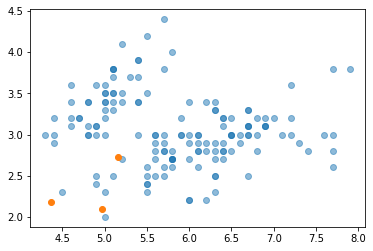

In [4]:
plt.scatter(x,y,alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

In [5]:
# Euclidean Distance을 이용하여 centroids에 가장 가까운 데이터들을 할당
def distance(a, b):
  return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5

In [6]:
# 각 데이터 포인트를 그룹화 할 labels을 생성합니다 (0, 1, 또는 2)
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x, y)))
# 각 데이터를 순회하면서 centroids와의 거리를 측정합니다
for i in range(len(samples)):
  distances = np.zeros(k)	# 초기 거리는 모두 0으로 초기화 해줍니다
  for j in range(k):
    distances[j] = distance(sepal_length_width[i], centroids[j])
  cluster = np.argmin(distances)	# np.argmin은 가장 작은 값의 index를 반환합니다
  labels[i] = cluster

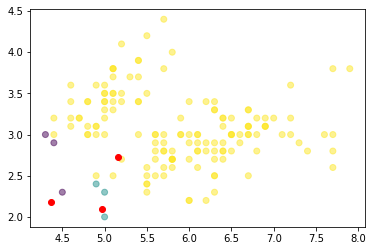

In [7]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

# Update Centroids

In [8]:
from copy import deepcopy
centroids_old = deepcopy(centroids)

In [9]:
# 각 클러스터에 속한 데이터들만 선택하여 points에 저장
# points의 각 좌표의 평균 지점을 cenroids로 지정 (평균값이 곧 클러스터의 센터를 의미)
for i in range(k):
  points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
  centroids[i] = np.mean(points, axis=0)

In [10]:
"""
plt.scatter(x,y,c=labels, alpha=0.5)
plt.scatter(centroids_old[])
plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.show()
"""

"\nplt.scatter(x,y,c=labels, alpha=0.5)\nplt.scatter(centroids_old[])\nplt.scatter(centroids[:,0], centroids[:,1], c='red')\nplt.show()\n"

# Repeat Step 2 ~ 3 Until Convergence
1. 2~3 단계를 반복하여 최적의 centroids 찾기


In [1]:
centroids_old = np.zeros(np.shape(centroids))	# 제일 처음 centroids_old는 0으로 초기화 해줍니다
labels = np.zeros(len(samples))
error = np.zeros(k)
# error 도 초기화 해줍니다
for i in range(k):
  error[i] = distance(centroids_old[i], centroids[i])
# STEP 4: error가 0에 수렴할 때 까지 2 ~ 3 단계를 반복합니다
while(error.all() != 0):
  # STEP 2: 가까운 centroids에 데이터를 할당합니다
  for i in range(len(samples)):
    distances = np.zeros(k)	# 초기 거리는 모두 0으로 초기화 해줍니다
    for j in range(k):
      distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)	# np.argmin은 가장 작은 값의 index를 반환합니다
    labels[i] = cluster
  # Step 3: centroids를 업데이트 시켜줍니다
  centroids_old = deepcopy(centroids)
  for i in range(k):
    # 각 그룹에 속한 데이터들만 골라 points에 저장합니다
    points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
    # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
    centroids[i] = np.mean(points, axis=0)
  # 새롭게 centroids를 업데이트 했으니 error를 다시 계산합니다
  for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])

NameError: ignored

In [2]:
type(centroids)

NameError: ignored

In [ ]:
colors=['r','g','b']
for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
  plt.scatter(points[:,0], points[:,1], c=colors[i], alpha=0.5)
  
  #D = dimaond 형태로 마킹
#plt.scatter(centroids[:,0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Scikit-learn을 활용한 kmean 구현(매우 간단)

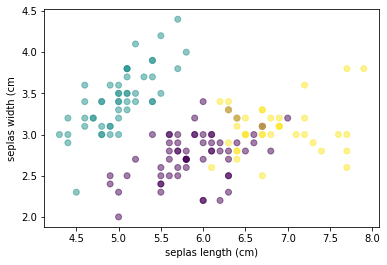

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris()
samples = iris.data

model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)

x= samples[:,0]
y= samples[:,1]
plt.scatter(x,y,c=labels, alpha=0.5)
plt.xlabel('seplas length (cm)')
plt.ylabel('seplas width (cm')
plt.show()





In [4]:
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] ==1:
      species[i] = 'versicolor'
  elif target[i] ==2:
      species[i] = 'virginica'


NameError: ignored

In [ ]:
import pandas as pd

df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

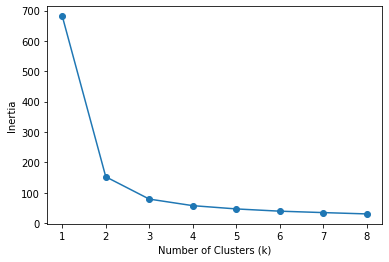

In [11]:
num_clusters = list(range(1, 9))
inertias = []

for i in num_clusters:
  model = KMeans(n_clusters=i)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()